In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import wind_power_bidding as wpb

In [2]:
# Load the forecast data
with open('InputData/Scenarios.pkl', 'rb') as file:
    data = pickle.load(file)
wind_forecast = data['wind_data_da']
spot_forecast = data['spot_prices']
# spot_forecast = np.ones(np.shape(spot_forecast))
imbalance_forecast = data['imbalance']
n1=20; n2=20; n3=4; n_scenarios = [n1,n2,n3]
print(np.shape(wind_forecast))
print(np.shape(spot_forecast))
print(np.shape(imbalance_forecast))

f_up= 1.25
f_down = 0.85

(24, 20)
(24, 20)
(24, 4)


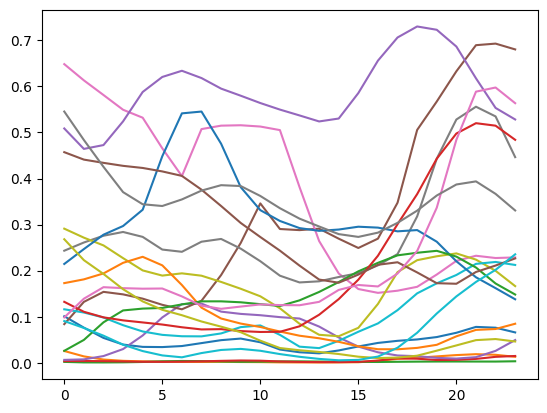

In [3]:
plt.plot(wind_forecast, label='Wind Forecast')

# 1) One price scheme

In [4]:
# combine scenarios and shuffle them 
import itertools

combined_scenarios = list(itertools.product(range(n1), range(n2), range(n3)))
np.random.seed(0)
shuffled_scenarios = np.random.permutation(combined_scenarios)

In [5]:
# nb_scenarios to consider
n_scenarios = 200
scenarios_id = shuffled_scenarios[:n_scenarios, :] # take the first n_scenarios as the in-sample scenarios
wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, price_scheme='one_price')

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:02:35 PM: Your problem has 14424 variables, 28848 constraints, and 0 parameters.


/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


(CVXPY) May 16 05:02:35 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:02:35 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:02:35 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:02:35 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 05:02:35 PM: Compiling problem (target solver=MOSEK).
(CVXPY) May 16 05:02:35 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) May 16 05:02:35 PM: Applying reduction FlipObjective
(CVXPY) May 16 05:02:35 PM: Applying reduction Dcp2Cone
(CVXPY) May 16 05:

/opt/homebrew/lib/python3.11/site-packages/mosek/__init__.py:18617: UserWarning: Argument sub in putvarboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putvarboundlist: Incorrect array format causing data to be copied");
/opt/homebrew/lib/python3.11/site-packages/mosek/__init__.py:18925: UserWarning: Argument subj in putclist: Incorrect array format causing data to be copied
  warnings.warn("Argument subj in putclist: Incorrect array format causing data to be copied");
/opt/homebrew/lib/python3.11/site-packages/mosek/__init__.py:18349: UserWarning: Argument sub in putconboundlist: Incorrect array format causing data to be copied
  warnings.warn("Argument sub in putconboundlist: Incorrect array format causing data to be copied");


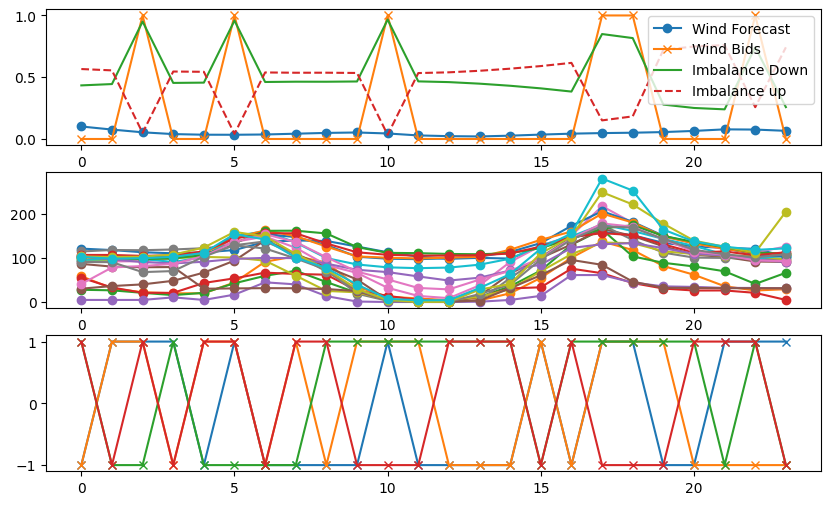

In [6]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1], label='Imbalance Down')
plt.plot(imbalances_up[:,:1], label='Imbalance up', linestyle='--')
plt.legend()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')

Expected Profit:  451.73917685707596


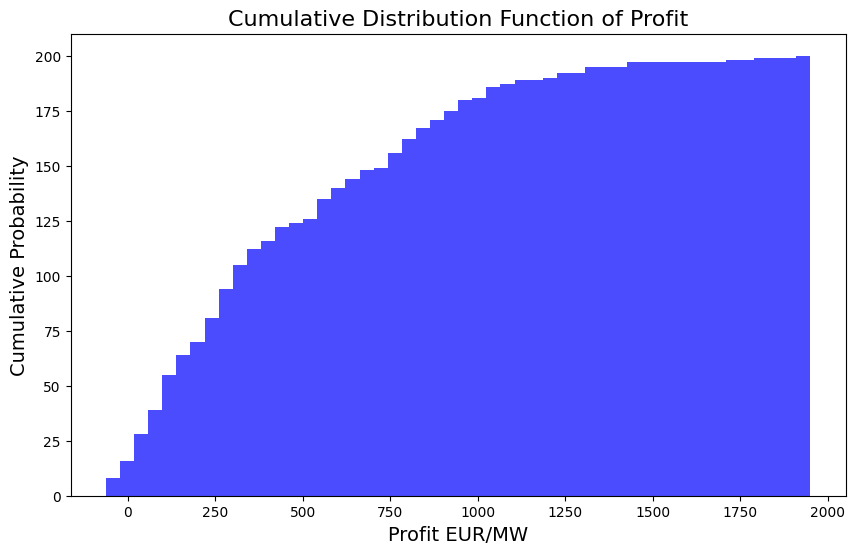

In [7]:
# compute profit of in-sample scenarios
# Compute the profit over all scenarios
profit = np.zeros((n_scenarios, 1))
for i in range(n_scenarios):
        profit[i] = wpb.compute_profit(wind_bids, wind_forecast[:, scenarios_id[i, 0]], spot_forecast[:,scenarios_id[i, 1]], imbalance_forecast[:, scenarios_id[i, 2]], f_down, f_up, 'one_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit', fontsize=16)
plt.xlabel('Profit EUR/MW', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.savefig('figs/1price_profit_cdf.png')

# 2) Two-price scheme

In [8]:
wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, price_scheme='two_price')

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:02:39 PM: Your problem has 14424 variables, 28848 constraints, and 0 parameters.
(CVXPY) May 16 05:02:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:02:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:02:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:02:39 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 05:02:40 PM: Compiling problem (target solver=MOSE

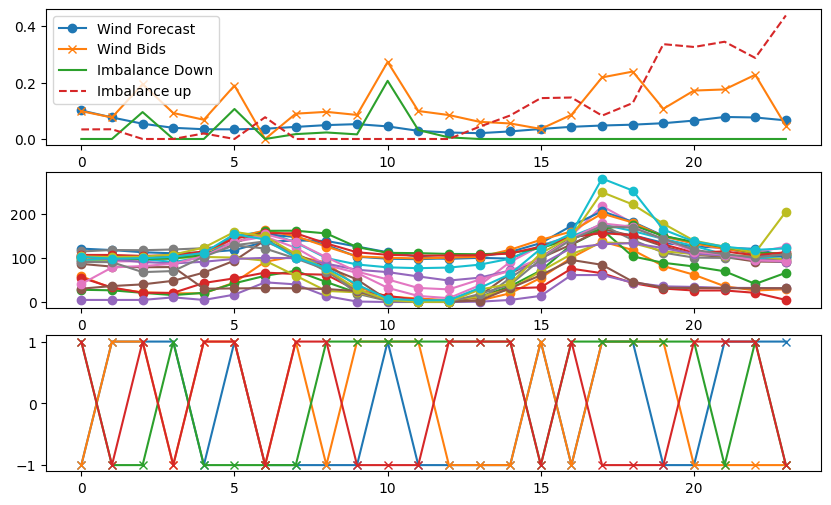

In [9]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1], label='Imbalance Down')
plt.plot(imbalances_up[:,:1], label='Imbalance up', linestyle='--')
plt.legend()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')

Expected Profit:  422.7789717521838


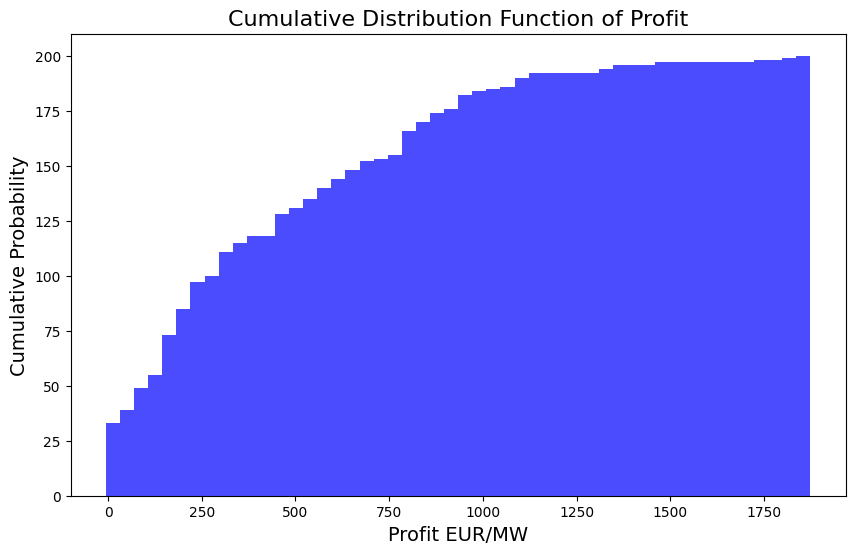

In [10]:
# compute profit of in-sample scenarios
# Compute the profit over all scenarios
profit = np.zeros((n_scenarios, 1))
for i in range(n_scenarios):
        profit[i] = wpb.compute_profit(wind_bids, wind_forecast[:, scenarios_id[i, 0]], spot_forecast[:,scenarios_id[i, 1]], imbalance_forecast[:, scenarios_id[i, 2]], f_down, f_up, 'one_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit', fontsize=16)
plt.xlabel('Profit EUR/MW', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.savefig('figs/2p_profit_cdf.png', dpi=300)

# 3) Ex-Post analysis

In [11]:
def k_fold_cross_validation(wind_forecast, spot_forecast, imbalance_forecast, shuffled_scenarios, f_up, f_down, scheme='one_price', reps=8):

    print("Performing k-fold cross-validation with {} folds...".format(reps))
    print("Price scheme: ", scheme)
    fold_size = len(shuffled_scenarios) // reps # should assert divisibility
    expected_in_profits = np.zeros((reps, 1))
    expected_out_profits = np.zeros((reps, 1))
    for k in range(reps):
        in_sample_scenarios = shuffled_scenarios[k*fold_size:(k+1)*fold_size, :] # since we shuffled scenarios, we can just take the fold_size scenarios from k*fold_size onwards
        out_sample_scenarios = np.delete(shuffled_scenarios, np.s_[k*fold_size:(k+1)*fold_size], axis=0) # delete in-sample scenarios from the shuffled scenarios

        # compute wind bids, only use in-sample scenarios
        wind_bids, _, _, _, _= wpb.wind_pp_bidding(wind_forecast[:, in_sample_scenarios[:, 0]], spot_forecast[:, in_sample_scenarios[:, 1]], imbalance_forecast[:, in_sample_scenarios[:, 2]], f_up, f_down, price_scheme=scheme)
        
        # compute profits 
        profits_in_sample = np.zeros((len(in_sample_scenarios), 1))
        for i in range(len(in_sample_scenarios)):
            # compute profits for in-sample scenarios
            profits_in_sample[i] = wpb.compute_profit(wind_bids, wind_forecast[:, in_sample_scenarios[i, 0]], spot_forecast[:, in_sample_scenarios[i, 1]], imbalance_forecast[:, in_sample_scenarios[i, 2]], f_down, f_up, scheme)
        profits_out_sample = np.zeros((len(out_sample_scenarios), 1))
        
        for i in range(len(out_sample_scenarios)):
            # compute profits for out-of-sample scenarios
            profits_out_sample[i] = wpb.compute_profit(wind_bids, wind_forecast[:, out_sample_scenarios[i, 0]], spot_forecast[:, out_sample_scenarios[i, 1]], imbalance_forecast[:, out_sample_scenarios[i, 2]], f_down, f_up, scheme)
        
        expected_in_profits[k] = np.mean(profits_in_sample)
        expected_out_profits[k] = np.mean(profits_out_sample)

    return expected_in_profits, expected_out_profits, profits_in_sample, profits_out_sample

## One Price

In [12]:
expected_in_profits, expected_out_profits, _, _ = k_fold_cross_validation(wind_forecast, spot_forecast, imbalance_forecast, shuffled_scenarios, f_up, f_down, scheme='one_price', reps=8)

Performing k-fold cross-validation with 8 folds...
Price scheme:  one_price
                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:02:44 PM: Your problem has 14424 variables, 28848 constraints, and 0 parameters.
(CVXPY) May 16 05:02:44 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:02:44 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:02:44 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:02:44 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------------------------------------------

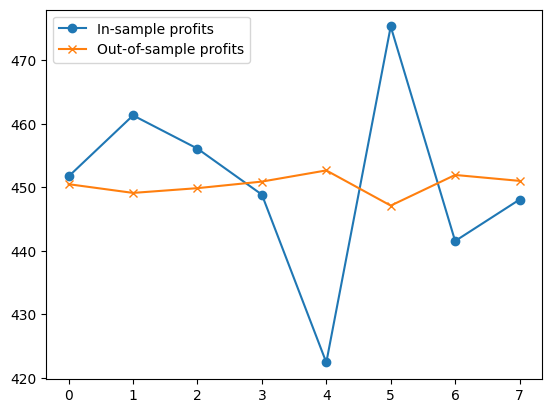

In [13]:
plt.plot(expected_in_profits, label='In-sample profits', marker='o')
plt.plot(expected_out_profits, label='Out-of-sample profits', marker='x')
plt.legend()

## Two-Price

In [14]:
expected_in_profits, expected_out_profits, _, _ = k_fold_cross_validation(wind_forecast, spot_forecast, imbalance_forecast, shuffled_scenarios, f_up, f_down, 'two_price', 8)

Performing k-fold cross-validation with 8 folds...
Price scheme:  two_price
                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:03:18 PM: Your problem has 14424 variables, 28848 constraints, and 0 parameters.
(CVXPY) May 16 05:03:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:03:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:03:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:03:19 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------------------------------------------

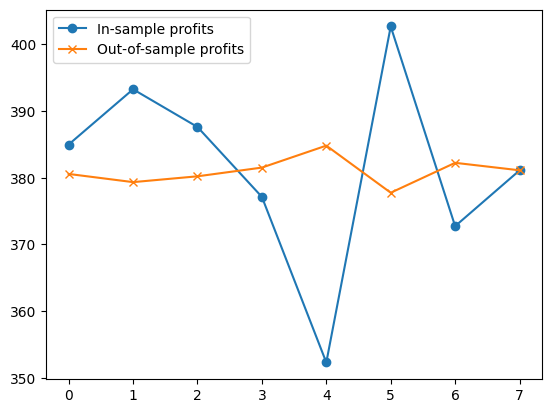

In [15]:
plt.plot(expected_in_profits, label='In-sample profits', marker='o')
plt.plot(expected_out_profits, label='Out-of-sample profits', marker='x')
plt.legend()

# 4) Risk adverse bidding strategy

In [24]:
# nb_scenarios to consider
n_scenarios = 200
scenarios_id = shuffled_scenarios[:n_scenarios, :] # take the first n_scenarios as the in-sample scenarios

In [25]:
scheme = 'one_price'
wind_bids_ra, prob_ra, imbalances_ra, imbalances_up_ra, imbalances_down_ra, expected_profit, cvar = wpb.wind_pp_bidding_ra(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, alpha=0.9, beta = 0, price_scheme=scheme)
# check : with beta = 0, the results should be the same as the previous res for selected price scheme
# NOTE: we chose the (1-beta)*p + beta*cvar objective, so 0<=beta<=1

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:04:29 PM: Your problem has 14625 variables, 29248 constraints, and 0 parameters.
(CVXPY) May 16 05:04:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:04:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:04:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:04:30 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 05:04:30 PM: Compiling problem (target solver=MOSE

In [26]:
cvar, expected_profit

(-62.148451376976034, 451.7391768570758)

In [27]:
wind_bids_ra, prob_ra, imbalances_ra, imbalances_up_ra, imbalances_down_ra, expected_profit, cvar = wpb.wind_pp_bidding_ra(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, alpha=0.9, beta = 0.95, price_scheme=scheme)

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:04:37 PM: Your problem has 14625 variables, 29248 constraints, and 0 parameters.
(CVXPY) May 16 05:04:37 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:04:37 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:04:37 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:04:37 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 05:04:38 PM: Compiling problem (target solver=MOSE

In [28]:
cvar, expected_profit

(17.35522266778434, 434.6187912157095)

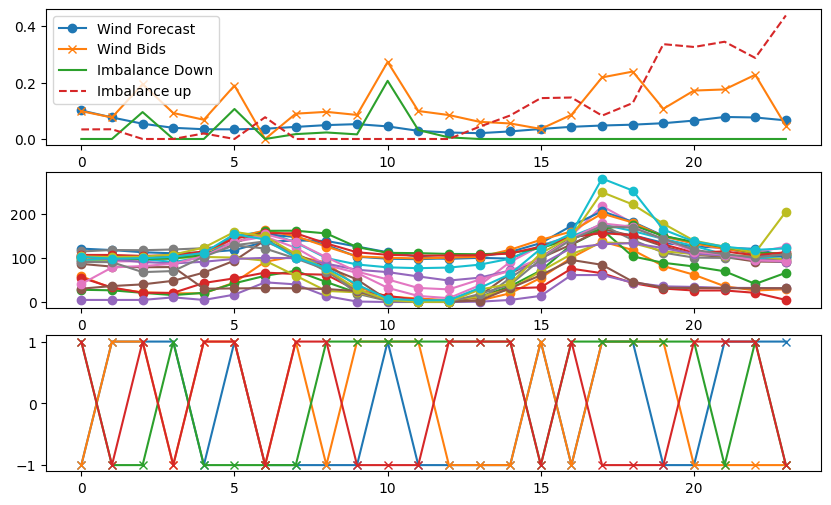

In [29]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1], label='Imbalance Down')
plt.plot(imbalances_up[:,:1], label='Imbalance up', linestyle='--')
plt.legend()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')

Expected Profit:  422.7789717521838


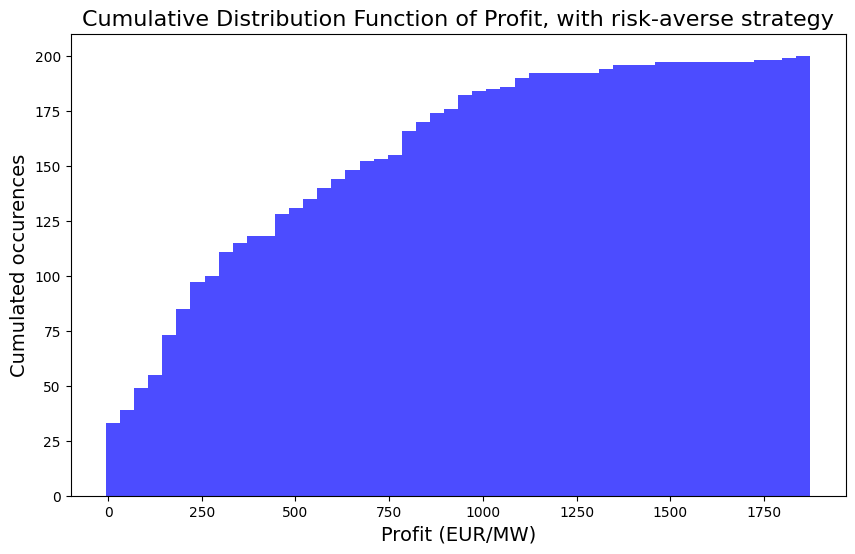

In [30]:
# compute profit of in-sample scenarios
# Compute the profit over all scenarios
profit = np.zeros((n_scenarios, 1))
for i in range(n_scenarios):
        profit[i] = wpb.compute_profit(wind_bids, wind_forecast[:, scenarios_id[i, 0]], spot_forecast[:,scenarios_id[i, 1]], imbalance_forecast[:, scenarios_id[i, 2]], f_down, f_up, scheme)

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit, with risk-averse strategy', fontsize=16)
plt.xlabel('Profit (EUR/MW)', fontsize=14)
plt.ylabel('Cumulated occurences', fontsize=14)
plt.savefig('figs/ra_ecdf_{}.png'.format(scheme), dpi=300)

In [31]:
# pareto frontier
n_points = 10
betas = np.linspace(0, 1-1/n_points, n_points)
exp_profs, cvars = list(), list()

for beta in betas:
    print("beta: ", beta)
    _, _, _, _, _, expected_profit, cvar = wpb.wind_pp_bidding_ra(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, alpha=0.9, beta=beta, price_scheme=scheme)
    exp_profs.append(expected_profit)
    cvars.append(cvar)

beta:  0.0
                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:04:46 PM: Your problem has 14625 variables, 29248 constraints, and 0 parameters.
(CVXPY) May 16 05:04:46 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:04:46 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:04:46 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:04:46 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 05:04:46 PM: Compiling problem (target 

In [32]:
betas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

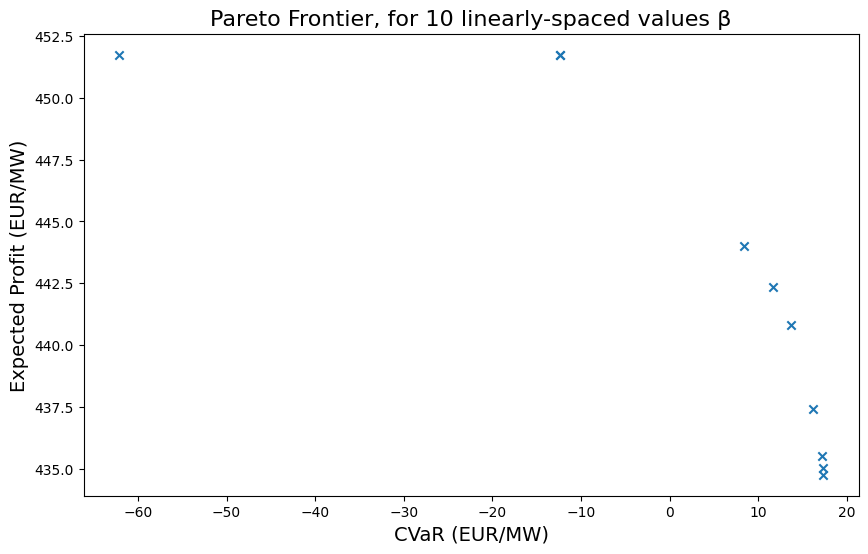

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(cvars, exp_profs, label='Pareto Frontier, for 10 linearly-spaced values β', marker='x')
plt.title('Pareto Frontier, for 10 linearly-spaced values β', fontsize=16)
plt.xlabel('CVaR (EUR/MW)', fontsize=14)
plt.ylabel('Expected Profit (EUR/MW)', fontsize=14)
plt.savefig('figs/ra_pareto_{}.png'.format(scheme), dpi=300)

In [34]:
# study volatility with scenarios
# first increase amount of scenarios
nbs = np.linspace(10, 500, 10, dtype=int)
beta = 0.7 # according to efficiency frontier, with high risk-aversion 
xpected_profits_nbs, cvars_nbs = list(), list()

for nb in nbs:
    scenarios_id = shuffled_scenarios[:nb, :] # take the first n_scenarios as the in-sample scenarios
    _, _, _, _, _, expected_profit_nbs, cvar_nbs = wpb.wind_pp_bidding_ra(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, alpha=0.9, beta=beta, price_scheme=scheme)
    xpected_profits_nbs.append(expected_profit_nbs)
    cvars_nbs.append(cvar_nbs)

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:06:06 PM: Your problem has 755 variables, 1508 constraints, and 0 parameters.
(CVXPY) May 16 05:06:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:06:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:06:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:06:06 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 05:06:06 PM: Compiling problem (target solver=MOSEK).

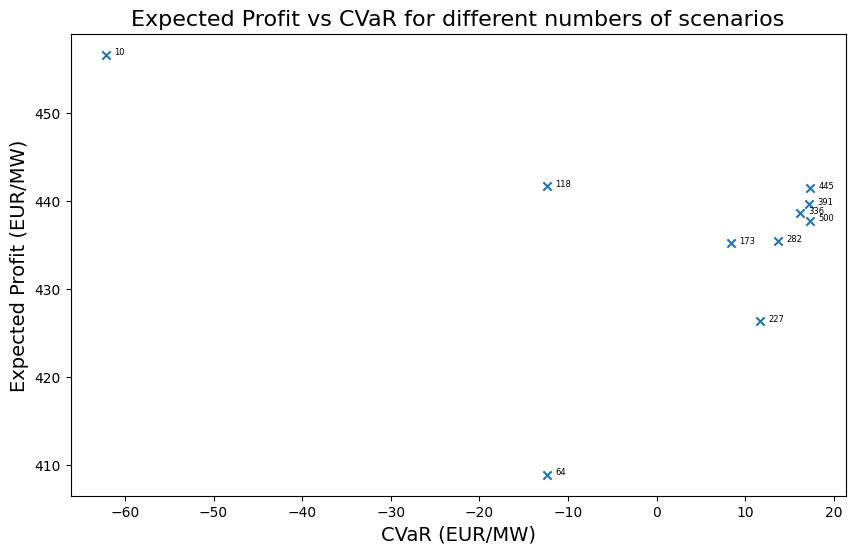

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(cvars, xpected_profits_nbs, label=nbs, marker='x')
plt.xlabel('CVaR')
plt.ylabel('Expected Profit')
# Annotate each point
for i in range(len(cvars)):
    plt.annotate(nbs[i], (cvars[i], xpected_profits_nbs[i]), textcoords="offset points", xytext=(6,0), ha='left', fontsize=6)

plt.xlabel('CVaR (EUR/MW)', fontsize=14)
plt.ylabel('Expected Profit (EUR/MW)', fontsize=14)
plt.title('Expected Profit vs CVaR for different numbers of scenarios', fontsize=16)
plt.savefig('figs/ra_scenarios_{}.png'.format(scheme), dpi=300)

In [39]:
# select sufficient amt of scenarios for cvar not to be volatile (using previous figure)
# now shuffle scenarios randomly and solve bidding problem
nsc = 300
n_shuffles = 10
xpected_profits, cvars = list(), list()

for i in range(n_shuffles):
    shuffled_scenarios = np.random.permutation(combined_scenarios)
    scenarios_id = shuffled_scenarios[:nsc, :] # take the first n_scenarios as the in-sample scenarios
    _, _, _, _, _, expected_profit, cvar = wpb.wind_pp_bidding_ra(wind_forecast[:, scenarios_id[:, 0]], spot_forecast[:, scenarios_id[:, 1]], imbalance_forecast[:, scenarios_id[:, 2]], f_up, f_down, alpha=0.9, beta=beta, price_scheme=scheme)
    xpected_profits.append(expected_profit)
    cvars.append(cvar)

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) May 16 05:12:50 PM: Your problem has 21925 variables, 43848 constraints, and 0 parameters.
(CVXPY) May 16 05:12:51 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 05:12:51 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 05:12:51 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 16 05:12:51 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 05:12:51 PM: Compiling problem (target solver=MOSE

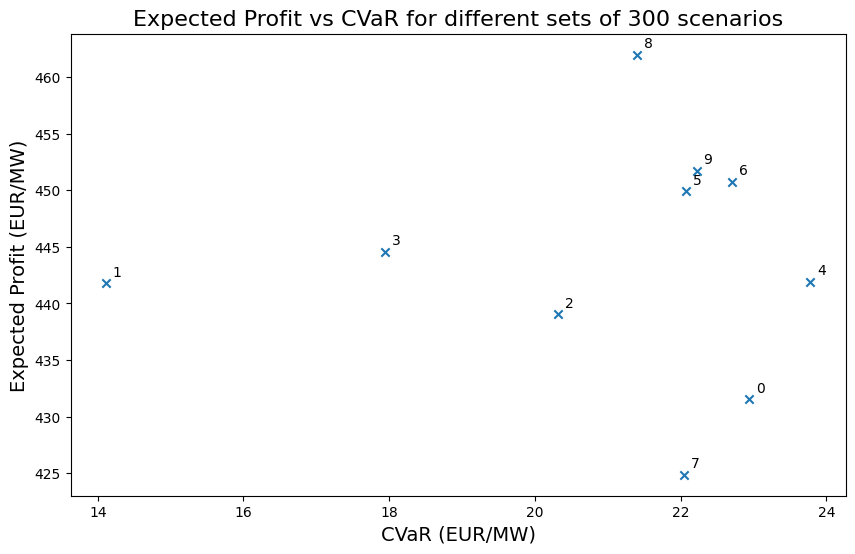

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(cvars, xpected_profits, label=nbs, marker='x')
plt.xlabel('CVaR')
plt.ylabel('Expected Profit')
# Annotate each point
for i in range(len(cvars)):
    plt.annotate(range(n_shuffles)[i], (cvars[i], xpected_profits[i]), textcoords="offset points", xytext=(5,5), ha='left')

plt.xlabel('CVaR (EUR/MW)', fontsize=14)
plt.ylabel('Expected Profit (EUR/MW)', fontsize=14)
plt.title('Expected Profit vs CVaR for different sets of 300 scenarios', fontsize=16)
plt.savefig('figs/ra_sets_{}.png'.format(scheme), dpi=300)